<a href="https://colab.research.google.com/github/sirisha-kumari/Machine-learning-project/blob/main/machinelearningproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Handwritten Digit Recognition using Neural Networks in TensorFlow***

### Installaing Necessary Libraries

In [1]:
pip install numpy pandas matplotlib tensorflow pillow

### Loading the MNIST Dataset

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from PIL import Image, ImageOps
import numpy as np

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

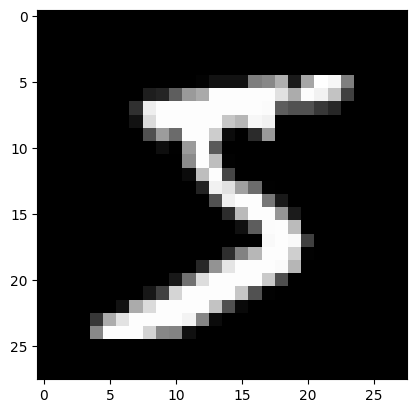

In [5]:
# Display the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.show()

### Building the Model

In [6]:
# Build the model
model = Sequential([
Flatten(input_shape=(28, 28)),
Dense(128, activation='relu'),
Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

### Training the Model

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2609 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1130 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0777 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0586 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0458 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0358 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0288 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

### Evaluating the Model

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9783
Accuracy: 97.83%


### Testing the Model with New Data

In [9]:
# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((28, 28))
    img = np.array(img) / 255.0
    img = img.reshape(1, 28, 28)
    return img

In [11]:
# Path to the handwritten digit image
image_path = '/content/digits.jpeg'
new_image = preprocess_image(image_path)

In [12]:
# Predict the digit
prediction = model.predict(new_image)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")

1/1 [==============================] - 0s 92ms/step
Predicted Digit: 7


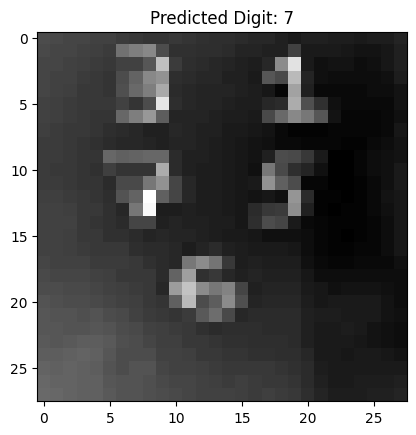

In [13]:
# Display the test image and the predicted digit
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()